<a href="https://colab.research.google.com/github/AKDR007/NaanMudhalvan-Student-Performance-analysis/blob/main/studentPerformanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
url = '/content/drive/MyDrive/StudentsPerformance.csv'
raw_data = pd.read_csv(url,index_col='Student Id')

In [ ]:
raw_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Student Id,,,,,,,,
101,female,group B,bachelor's degree,standard,none,72,72,74
102,female,group C,some college,standard,completed,69,90,88
103,female,group B,master's degree,standard,none,90,95,93
104,male,group A,associate's degree,free/reduced,none,47,57,44
105,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
1096,female,group E,master's degree,standard,completed,88,99,95
1097,male,group C,high school,free/reduced,none,62,55,55
1098,female,group C,high school,free/reduced,completed,59,71,65


In [5]:
raw_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


let's assume that the pass **mark** is **50%**


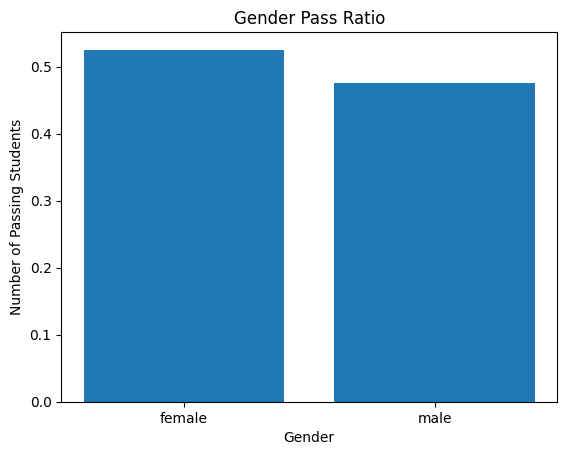

In [6]:
genderPassRatio = raw_data[(raw_data["math score"] > 50) & (raw_data["reading score"] > 50) & (raw_data["writing score"] > 50)]["gender"]
genderPassRatio = genderPassRatio.value_counts(normalize=True)
plt.bar(genderPassRatio.index, genderPassRatio.values)

plt.xlabel("Gender")
plt.ylabel("Number of Passing Students")
plt.title("Gender Pass Ratio")

plt.show()

<ipython-input-7-30e9c8a4858f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=scores_df, shade=True)


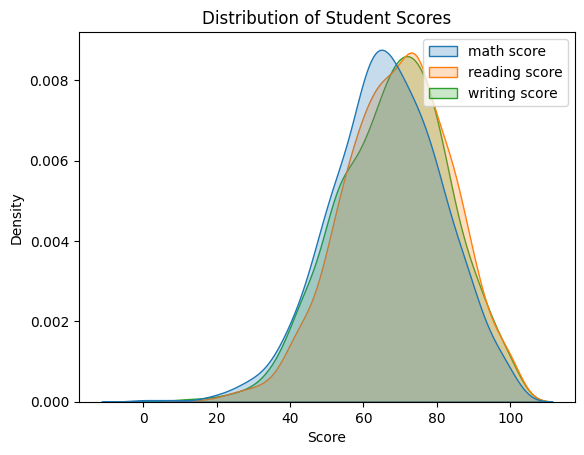

In [7]:

scores_df = raw_data[["math score", "reading score", "writing score"]]

sns.kdeplot(data=scores_df, shade=True)

plt.xlabel("Score")
plt.title("Distribution of Student Scores")

plt.show()

<ipython-input-8-6377761e7661>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=group_data, x="mean_score", label=group_name, shade=True)
<ipython-input-8-6377761e7661>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=group_data, x="mean_score", label=group_name, shade=True)
<ipython-input-8-6377761e7661>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=group_data, x="mean_score", label=group_name, shade=True)
<ipython-input-8-6377761e7661>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kde

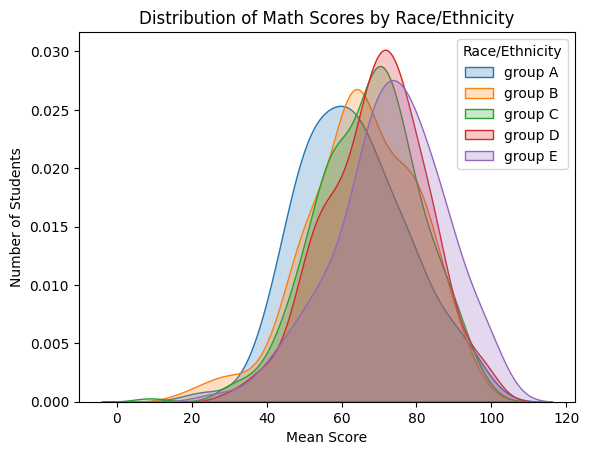

In [8]:

#Group the data by race/ethnicity
raw_data["mean_score"] = raw_data[["math score", "reading score", "writing score"]].mean(axis=1)
grouped_data = raw_data.groupby("race/ethnicity")
# Plot histograms for each race/ethnicity group
for group_name, group_data in grouped_data:
    
    sns.kdeplot(data=group_data, x="mean_score", label=group_name, shade=True)

# Set the x-axis label and title
plt.xlabel("Mean Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Math Scores by Race/Ethnicity")

# Add a legend
plt.legend(title="Race/Ethnicity")

# Show the plot
plt.show()

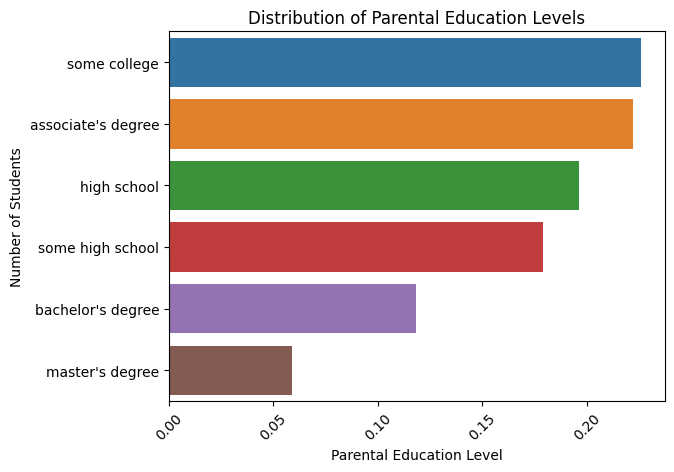

In [ ]:
parent_education_counts = raw_data["parental level of education"].value_counts(normalize=True)

sns.barplot(y=parent_education_counts.index, x=parent_education_counts.values)

plt.xlabel("Parental Education Level")
plt.ylabel("Number of Students")
plt.title("Distribution of Parental Education Levels")

plt.xticks(rotation=45)

plt.show()

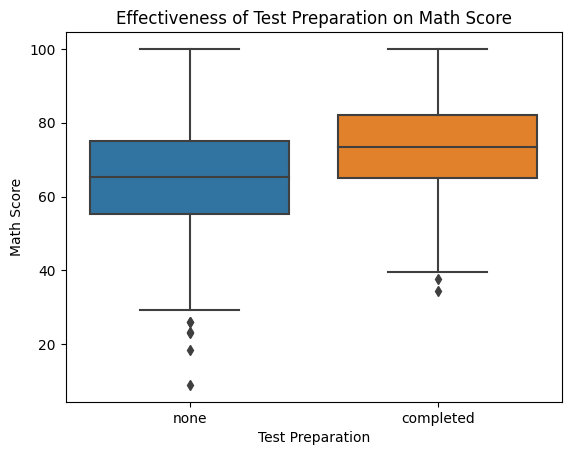

In [ ]:

sns.boxplot(x="test preparation course", y="mean_score", data=raw_data)

plt.xlabel("Test Preparation")
plt.ylabel("Math Score")
plt.title("Effectiveness of Test Preparation on Math Score")

plt.show()

<ipython-input-10-f12028e0a18c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prep_material_scores = raw_data.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]


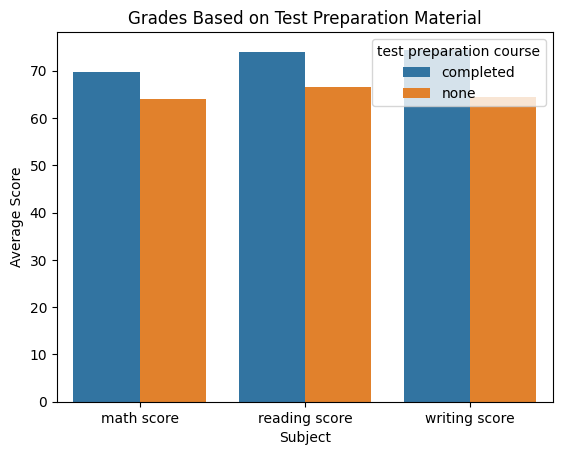

In [ ]:
# Calculate the average scores for each test preparation material
prep_material_scores = raw_data.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

# Reset the index to make "test preparation" a column
prep_material_scores = prep_material_scores.reset_index()

# Melt the DataFrame to long format
prep_material_scores = prep_material_scores.melt(id_vars="test preparation course", value_vars=["math score", "reading score", "writing score"],
                                                 var_name="subject", value_name="average score")

# Create a bar plot
sns.barplot(x="subject", y="average score", hue="test preparation course", data=prep_material_scores)

# Set the x-axis label and title
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.title("Grades Based on Test Preparation Material")

# Show the plot
plt.show()

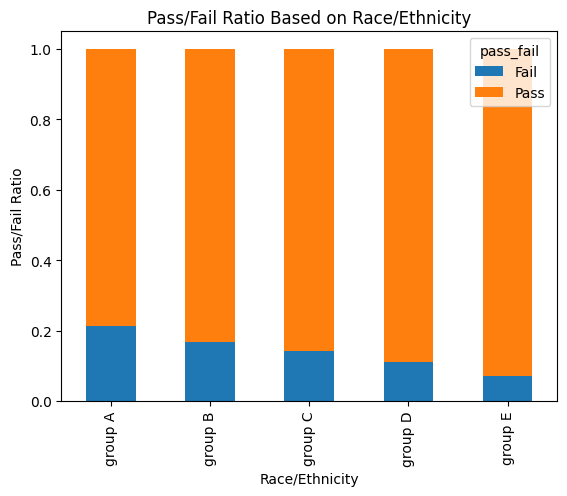

In [ ]:

# Define the pass/fail threshold
threshold = 50

# Create a new column indicating whether each student passed or failed
raw_data["pass_fail"] = raw_data["math score"].apply(lambda score: "Pass" if score >= threshold else "Fail")

# Calculate the pass/fail ratio for each race/ethnicity group
pass_fail_ratio = raw_data.groupby("race/ethnicity")["pass_fail"].value_counts(normalize=True).unstack()

# Create a bar plot
pass_fail_ratio.plot(kind="bar", stacked=True)

# Set the x-axis label and title
plt.xlabel("Race/Ethnicity")
plt.ylabel("Pass/Fail Ratio")
plt.title("Pass/Fail Ratio Based on Race/Ethnicity")

# Show the plot
plt.show()
